In [1]:
from poly_approx.approx import kappa_map,approx_erf,poly_plot,tossing_verification,approx_verification
from algo.low_depth_algo import low_depth
import numpy as np
from scipy.special import erfinv, erf
import matplotlib.pyplot as plt

# Part I: Polynomial approximation

## 1.1 Testing the approximation quality of Chebyshev expansion

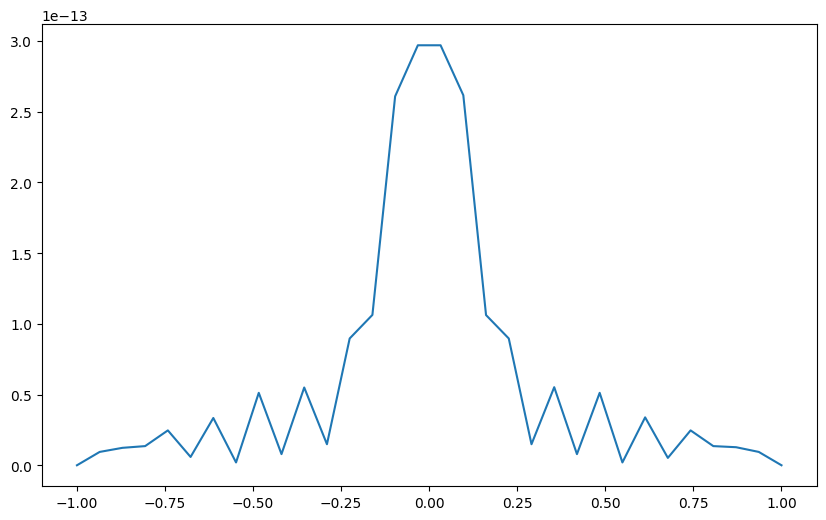

In [4]:
k = 100
epsilon = 10**(-5)
error_map = lambda x: np.abs(approx_erf(x,k,epsilon)-erf(k*x))
x = np.linspace(-1,1,2**5)
y = error_map(x)
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x,y)

## 1.2  Illustrating the construction of the approximating polynomials

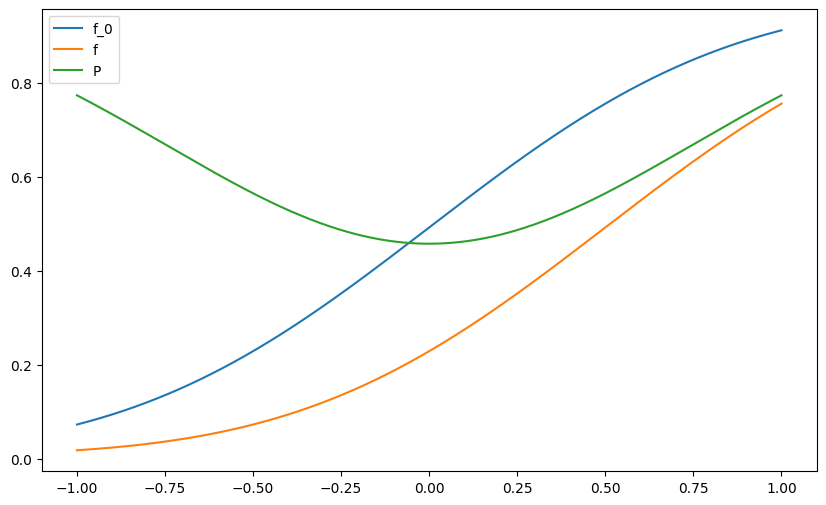

In [5]:
a_min,a_max = 0,1
a_mid = (a_min+a_max)/2
eta,tau = 0.01,0.01
gamma = 0.01
Delta = a_max-a_min
k = 0.5*kappa_map(tau)/Delta
kappa = kappa_map(tau)
f_0,f,P = poly_plot(a_min,a_max, k, tau, eta)

## 1.3 Verifying the validity of the main bounds i.e. eqs (151)-(160)

True

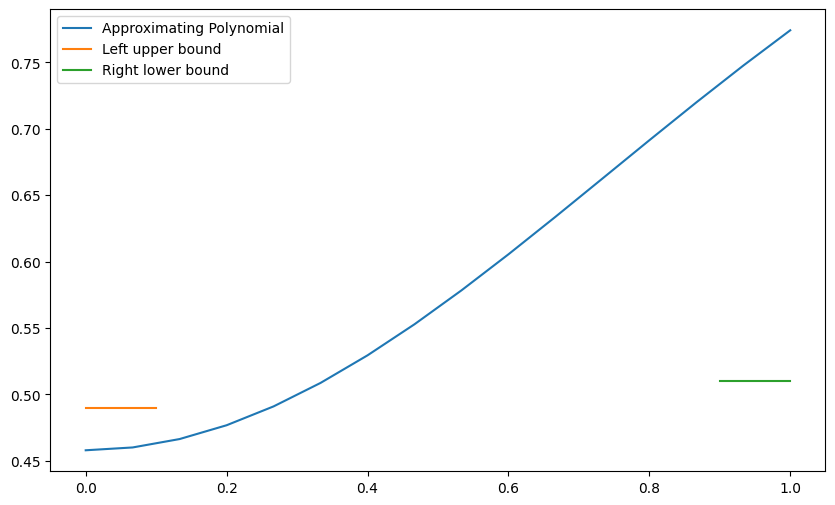

In [6]:
tossing_verification(a_min,a_max,k,tau,eta,gamma,approx_mode='poly',display=True)

## 1.4 Verifying the validity of Lemma 29

False

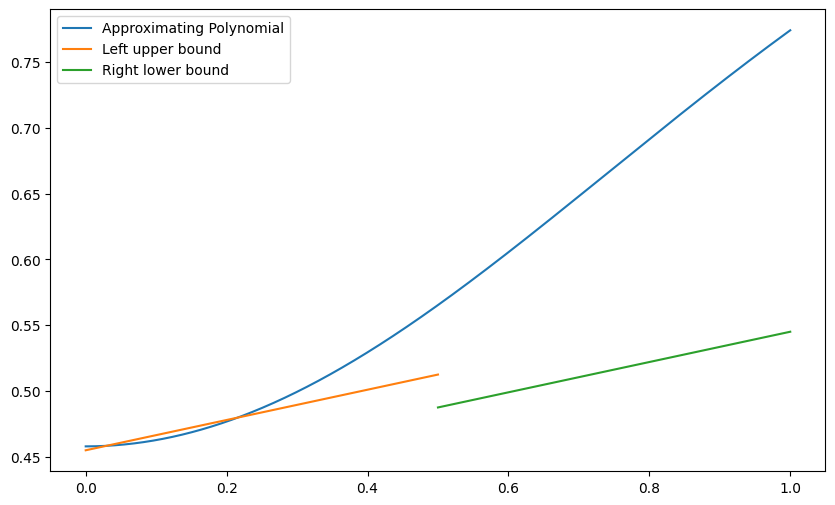

In [7]:
a = 0.4
approx_verification(a,a_min,a_max,k,tau,eta,approx_mode='poly',display=True)

## 1.5 Compare the newly established tight bounds to the original bounds

In [8]:
def first_inequality(tau):
    kappa = kappa_map(tau)
    nominator = 2+4*tau+erf(-20*tau*kappa)+erf(20*tau*kappa-kappa/2)
    denominator = 2+5*tau
    quantity = nominator/denominator
    bound = 0.5-tau
    gap = bound-quantity
    return quantity,bound,gap
def second_inequality(tau):
    kappa = kappa_map(tau)
    nominator = 1+erf(20*tau*kappa)
    denominator = 2+5*tau
    quantity = nominator/denominator
    bound = 0.5+tau
    gap = quantity-bound
    return quantity,bound,gap

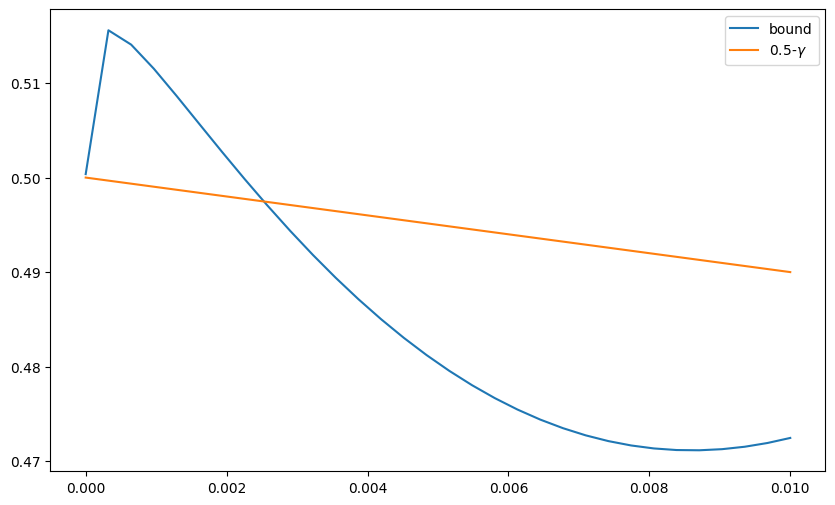

In [9]:
taus = np.linspace(10**(-10),10**(-2),2**5)
quantities = []
bounds = []
gaps = []
for tau in taus:
    quantity,bound,gap = first_inequality(tau)
    quantities.append(quantity)
    bounds.append(bound)
    gaps.append(gap)
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(taus,quantities)
ax.plot(taus,bounds)
ax.legend(['bound','0.5-$\gamma$'])

## 1.6 Showing counter example to the original bounds

False

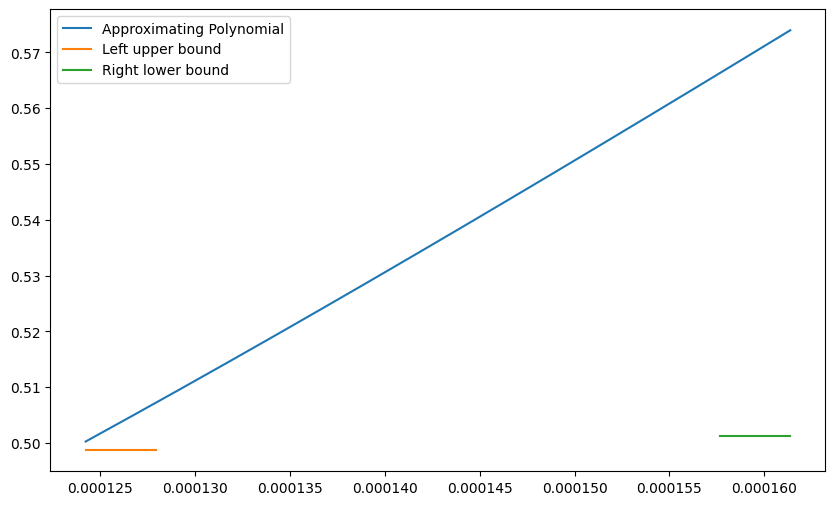

In [11]:
tau, eta,gamma = 0.0013, 0.0013,0.0013
kappa = kappa_map(tau)
Delta_b = tau/0.01
beta = 0.2
Delta = Delta_b**(1/beta)
a_mid = 0.5*Delta**(1-beta)
a_min = a_mid -0.5*Delta
a_max = a_mid+0.5*Delta
k = 0.5*kappa*Delta**(-1+beta)
tossing_verification(a_min,a_max,k,tau,eta,gamma,approx_mode='erf',display=True)

# Part 2: Low depth algorithm

## 2.1 Providing counter example to the original algorithm

In [12]:
a = 0.01
epsilon = 10**(-5)
delta = 10**(-2)
beta = 0.5
approx_mode = 'erf'
bias_mode = 'partial'
version = 'old'
l_d = low_depth(epsilon,delta,beta,a,approx_mode,bias_mode,version)
a_hat,d,D = l_d._main()
print('The value of a_hat,d and D: ',a_hat,d,D) 

  0%|          | 0/110 [00:00<?, ?it/s]

Failure to satisfy the desired bounds at iteration  75
The value of a_min,a_max,k,tau,eta,gamma at this step : (0.00981445439083119, 0.010184442875866317, 75.02547960566763, 0.00019235084742083323, 0.00019235084742083323, 0.00019235084742083323)
Failure to satisfy the desired bounds at iteration  76
The value of a_min,a_max,k,tau,eta,gamma at this step : (0.009851453239334703, 0.010184442875866317, 79.33346265158775, 0.00018248003631400736, 0.00018248003631400736, 0.00018248003631400736)
Failure to satisfy the desired bounds at iteration  77
The value of a_min,a_max,k,tau,eta,gamma at this step : (0.009884752202987864, 0.010184442875866317, 83.8871548258093, 0.00017311576267874993, 0.00017311576267874993, 0.00017311576267874993)
Failure to satisfy the desired bounds at iteration  78
The value of a_min,a_max,k,tau,eta,gamma at this step : (0.00991472127027571, 0.010184442875866317, 88.70049650016131, 0.00016423203268260664, 0.00016423203268260664, 0.00016423203268260664)
The value of a_

## 2.2 Testing the new algorithm

In [13]:
a = 0.01
epsilon = 10**(-5)
delta = 10**(-2)
beta = 0.5
approx_mode = 'erf'
bias_mode = 'partial'
version = 'new'
l_d = low_depth(epsilon,delta,beta,a,approx_mode,bias_mode,version)
a_hat,d,D = l_d._main()
print('The value of a_hat,d and D: ',a_hat,d,D) 

  0%|          | 0/110 [00:00<?, ?it/s]

The value of a_hat,d and D:  0.010000452107880713 36939 1106542113977801
